In [24]:
import numpy as np
import matplotlib.pyplot as plt

Define transition, emission, initial probability that are central to a HMM process

In [ ]:
       # Hidden State Ha   Hb    Hc
transition_matrix = [[0.9,0.05,0.05],
                     [0.05,0.9,0.05],
                     [0.05,0.05,0.9]]
transition_matrix = np.array(transition_matrix)
       # emissions  # A   B    C
emission_matrix = [[0.9,0.05,0.05],
                     [0.05,0.9,0.05],
                     [0.05,0.05,0.9]]
emission_matrix = np.array(emission_matrix)

pi = [0.3,0.4,0.3]

Updating the model; The point is to treat this process as matrix multiplication with 2 parts: vectors, and the weighted transition matrix it multiplies to...

In [26]:
# Forward Algorithm
print(emission_matrix[:,0])
alpha = pi * emission_matrix[:,0]
print("alpha:", alpha)

[0.9  0.05 0.05]
alpha: [0.27  0.02  0.015]


In [29]:
# helper function
def get_cartesian_from_barycentric(b):
    t = np.transpose(np.array([[0,0],[1,0],[0.5, np.sqrt(3)/2]])) # Triangle
    return t.dot(b)

print(get_cartesian_from_barycentric(alpha))

[0.97905462 0.00486723]


dice: 2
alpha: [0.04860668 0.11627416 0.83511917]
store: [0.53383374 0.72323441]
dice: 2
alpha: [0.00656123 0.01069397 0.9827448 ]
store: [0.50206637 0.85108197]
dice: 0
alpha: [0.51438799 0.03038337 0.45522864]
store: [0.25799769 0.39423957]
dice: 0
alpha: [0.94476189 0.00816833 0.04706978]
store: [0.03170322 0.04076362]
dice: 2
alpha: [0.33715187 0.02250574 0.64034239]
store: [0.34267693 0.55455278]
dice: 0
alpha: [0.90130374 0.01028436 0.0884119 ]
store: [0.05449031 0.07656695]
dice: 0
alpha: [0.98763656 0.00394933 0.00841411]
store: [0.00815639 0.00728683]
dice: 1
alpha: [0.46641816 0.50361332 0.02996852]
store: [0.51859758 0.0259535 ]
dice: 1
alpha: [0.04891476 0.9428162  0.00826903]
store: [0.94695072 0.00716119]
dice: 0
alpha: [0.64470591 0.33298954 0.02230455]
store: [0.34414182 0.01931631]
dice: 0
alpha: [0.96399785 0.02982636 0.00617579]
store: [0.03291425 0.00534839]
dice: 1
alpha: [0.38114935 0.59462898 0.02422168]
store: [0.60673982 0.02097659]
dice: 1
alpha: [0.03581335 0

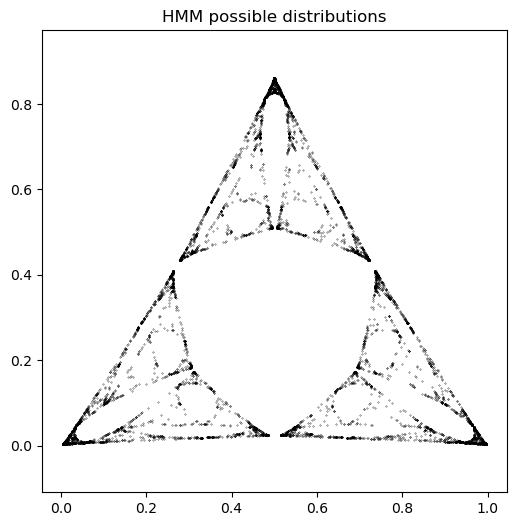

In [32]:
store = [get_cartesian_from_barycentric(alpha)]

for t in range(1,10000):
    dice = np.random.choice([0,1,2]) 
    print("dice:", dice)
    alpha = (alpha @ transition_matrix) * emission_matrix[:,dice]
    alpha = alpha / np.sum(alpha)
    print("alpha:", alpha)
    store.append(get_cartesian_from_barycentric(alpha))
    print("store:", store[-1])
    
# Plotting
store = np.array(store)
plt.figure(figsize=(6, 6))
plt.plot(store[:, 0], store[:, 1], 'k.', markersize=0.5)
plt.axis('equal')
plt.title("HMM possible distributions")
plt.show()